In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Importing Liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
#data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition')

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
have_duplicated_row = df.duplicated().any()
have_duplicated_row

False

In [ ]:
df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Exploratory Data Analysis

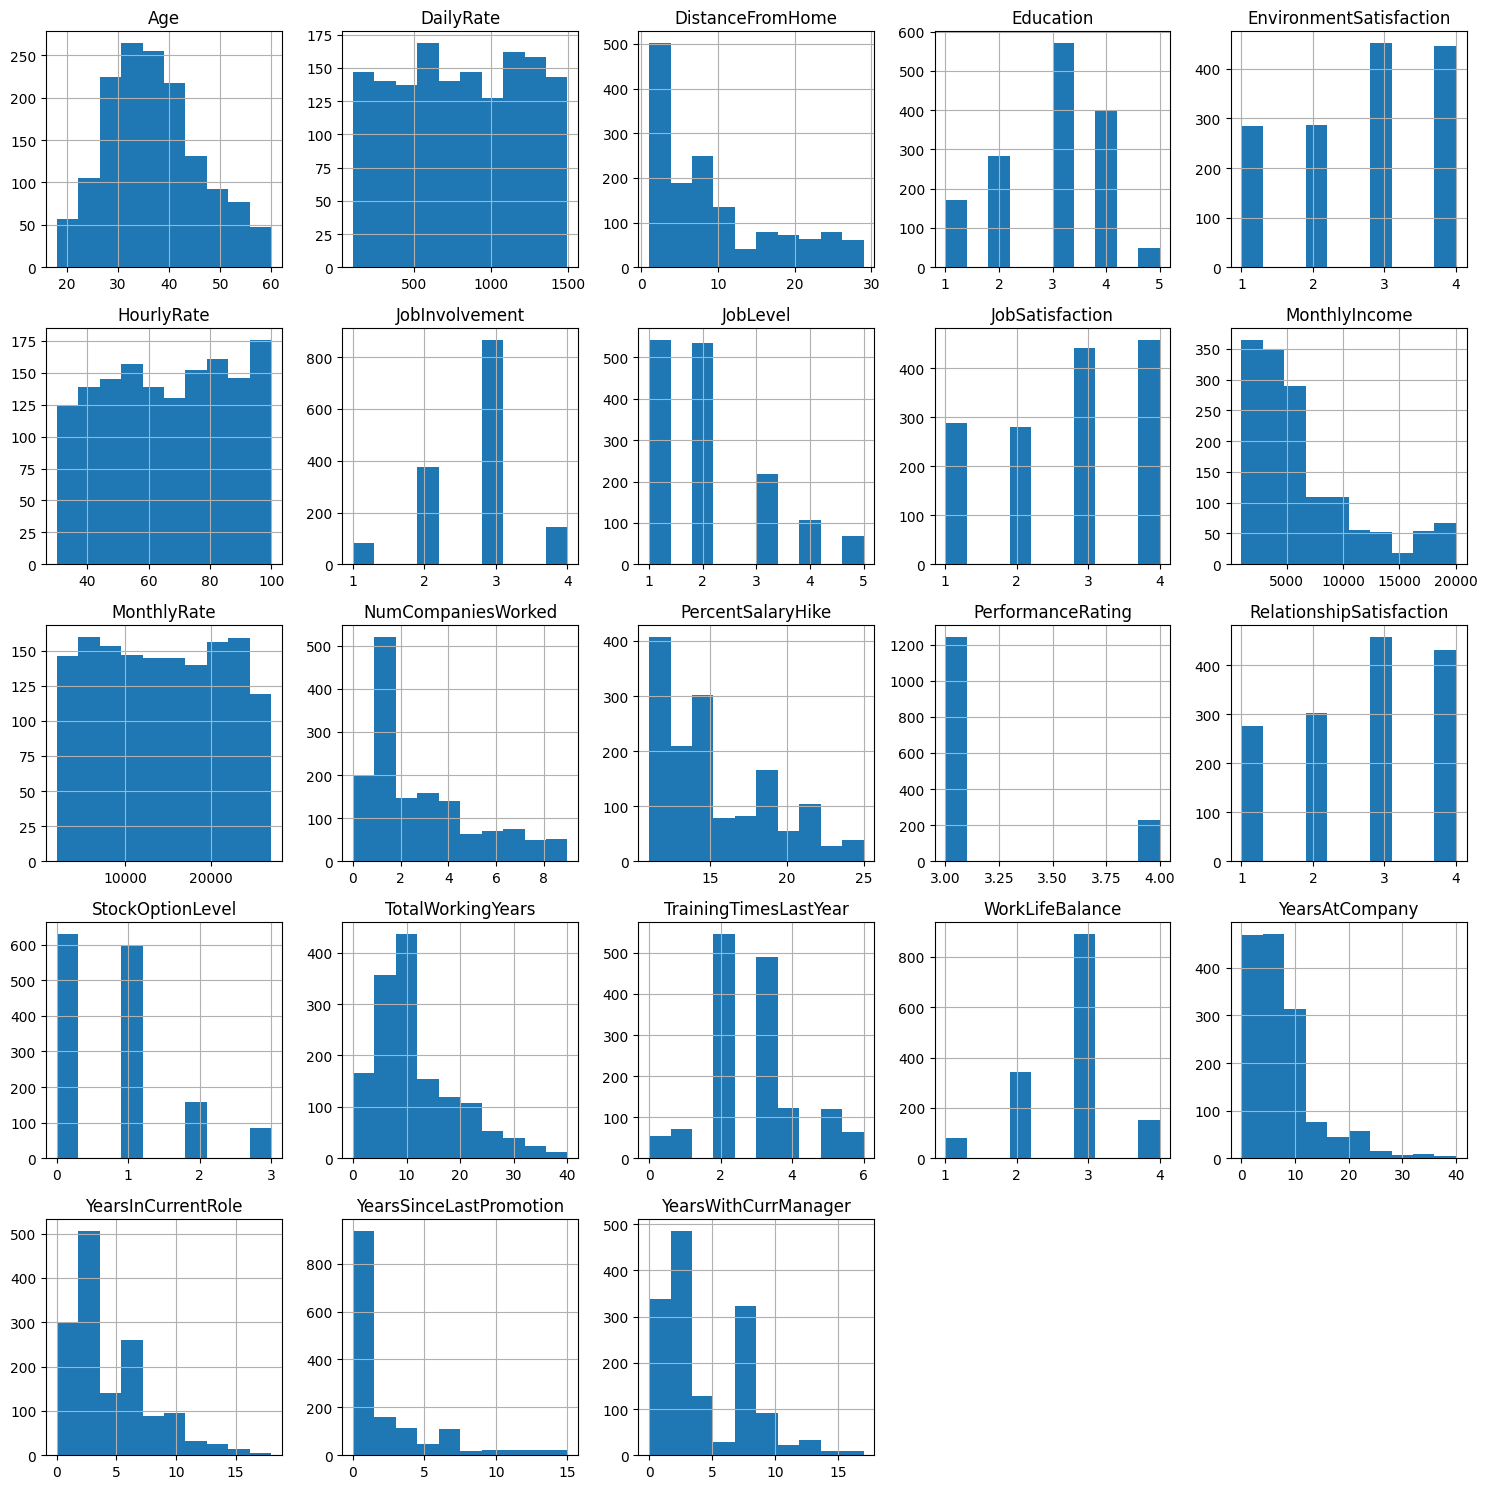

In [ ]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

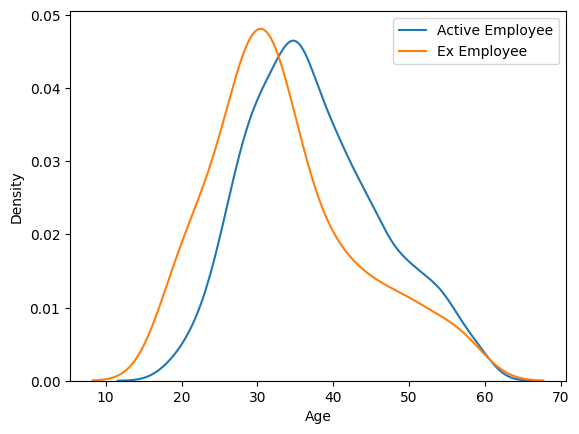

In [ ]:
sns.kdeplot(df.loc[df['Attrition']=='No','Age'],label='Active Employee')
sns.kdeplot(df.loc[df['Attrition']=='Yes','Age'],label='Ex Employee')

plt.legend()
plt.show()

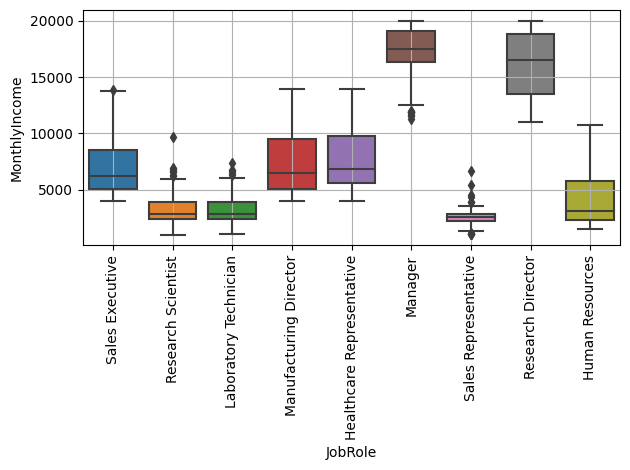

In [ ]:
ax=sns.boxplot(y=df['MonthlyIncome'],x=df['JobRole'])
plt.setp(ax.get_xticklabels(), rotation=90)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

# Relationship Discovery

In [ ]:
#Categorical Columns
cat = df.select_dtypes(['object']).columns
#Numerical Columns
num = df.select_dtypes(['number']).columns


print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#PrintUnique values of categorical columns
for i in cat:
    print("unique values of:",i,set(df[i]))

unique values of: Attrition {'Yes', 'No'}
unique values of: BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
unique values of: Department {'Human Resources', 'Sales', 'Research & Development'}
unique values of: EducationField {'Technical Degree', 'Marketing', 'Other', 'Medical', 'Human Resources', 'Life Sciences'}
unique values of: Gender {'Male', 'Female'}
unique values of: JobRole {'Research Director', 'Sales Representative', 'Research Scientist', 'Manufacturing Director', 'Healthcare Representative', 'Laboratory Technician', 'Sales Executive', 'Human Resources', 'Manager'}
unique values of: MaritalStatus {'Divorced', 'Married', 'Single'}
unique values of: OverTime {'Yes', 'No'}


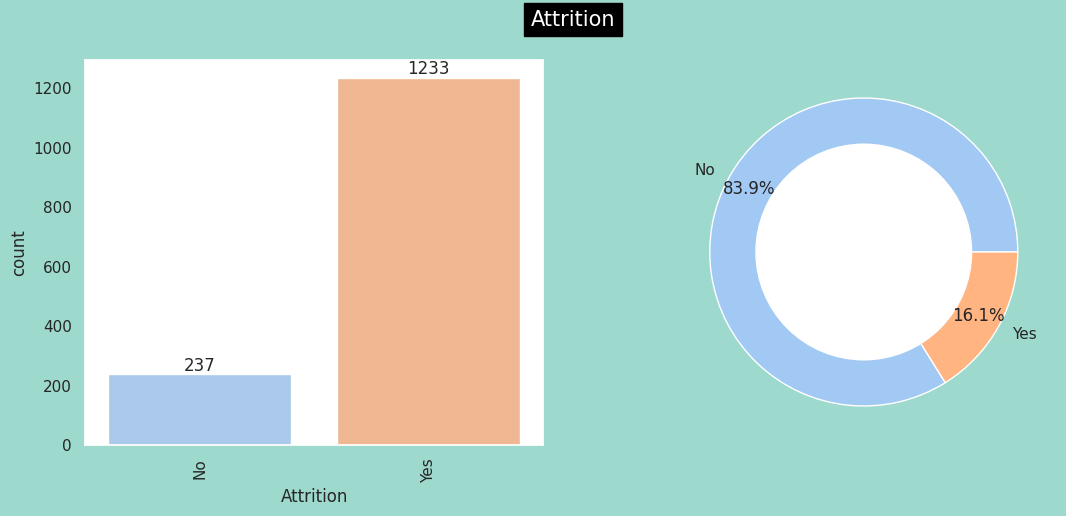

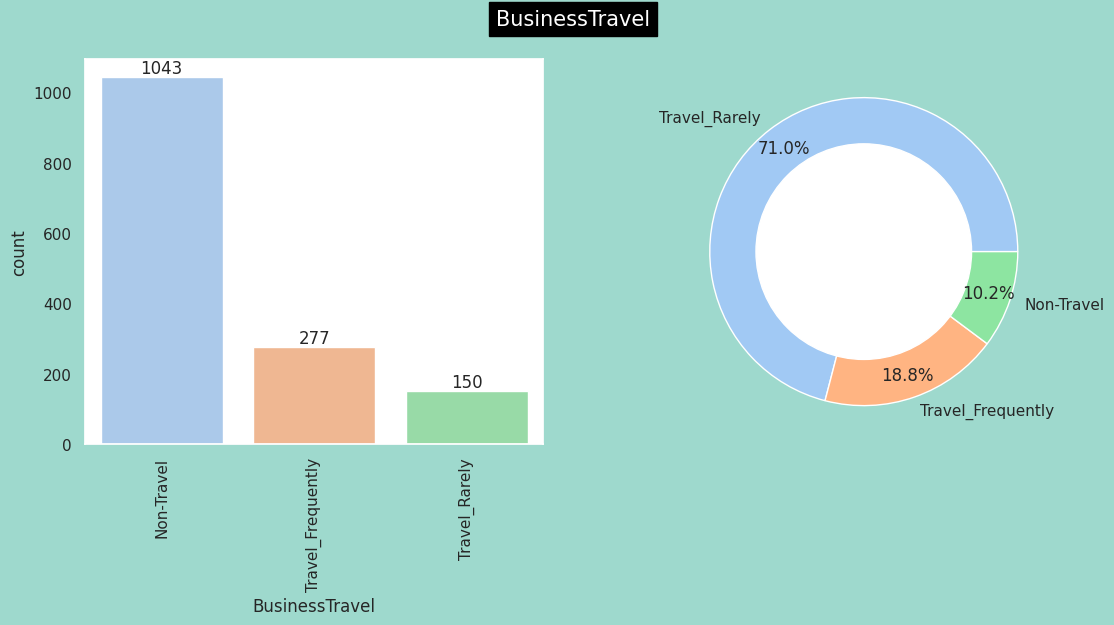

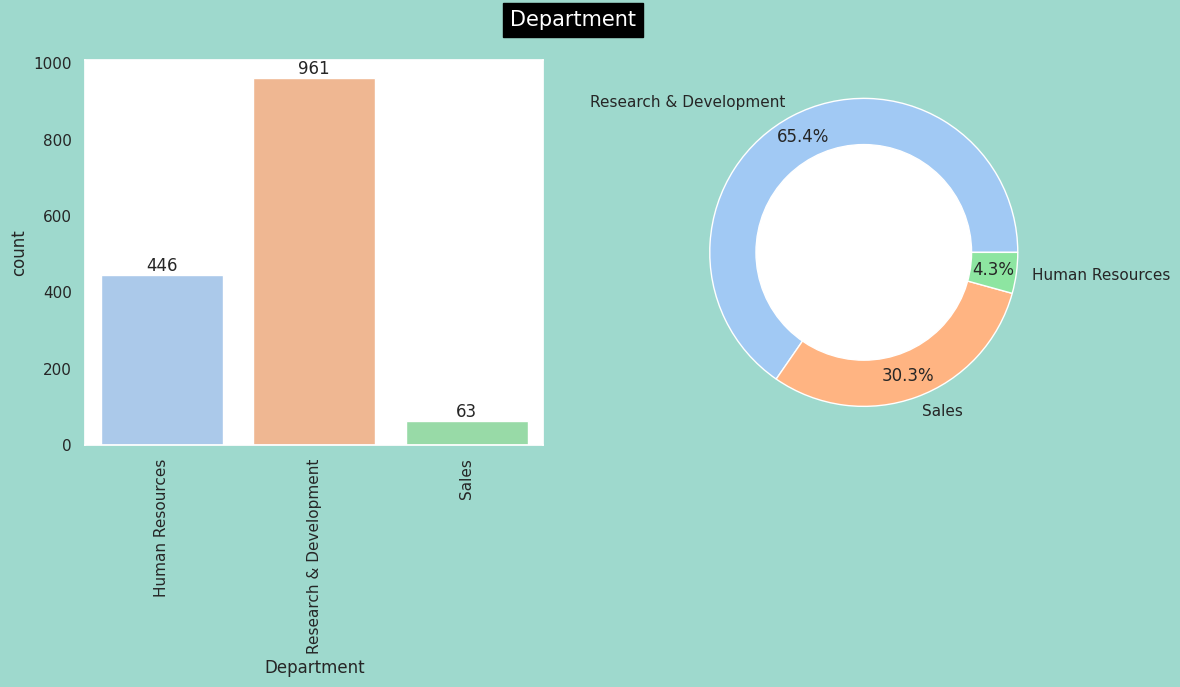

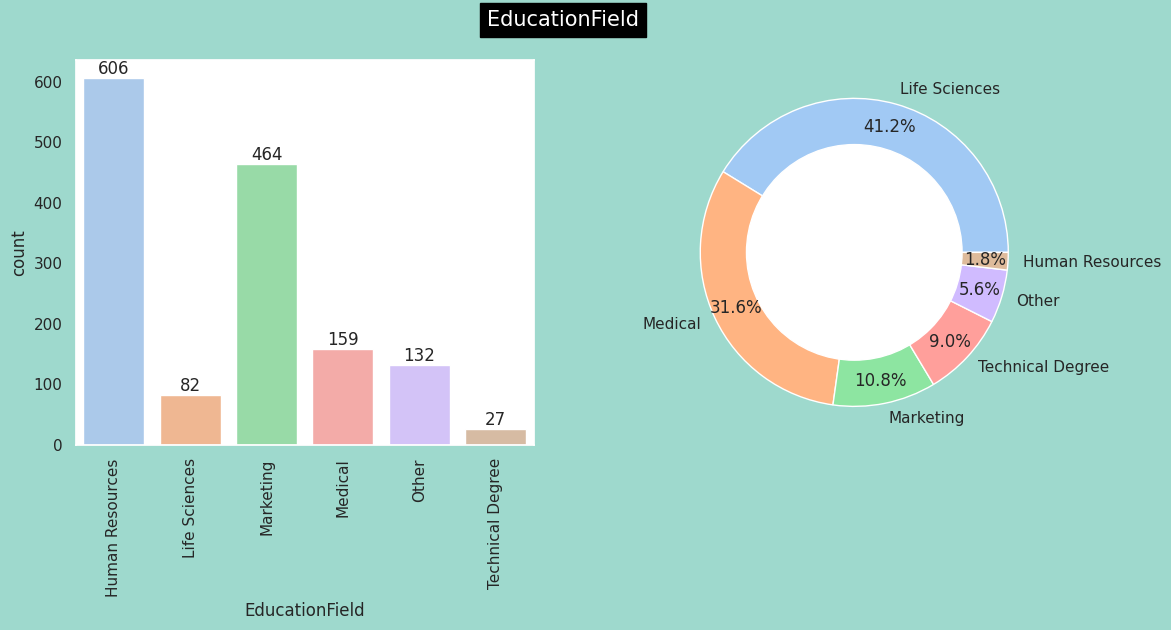

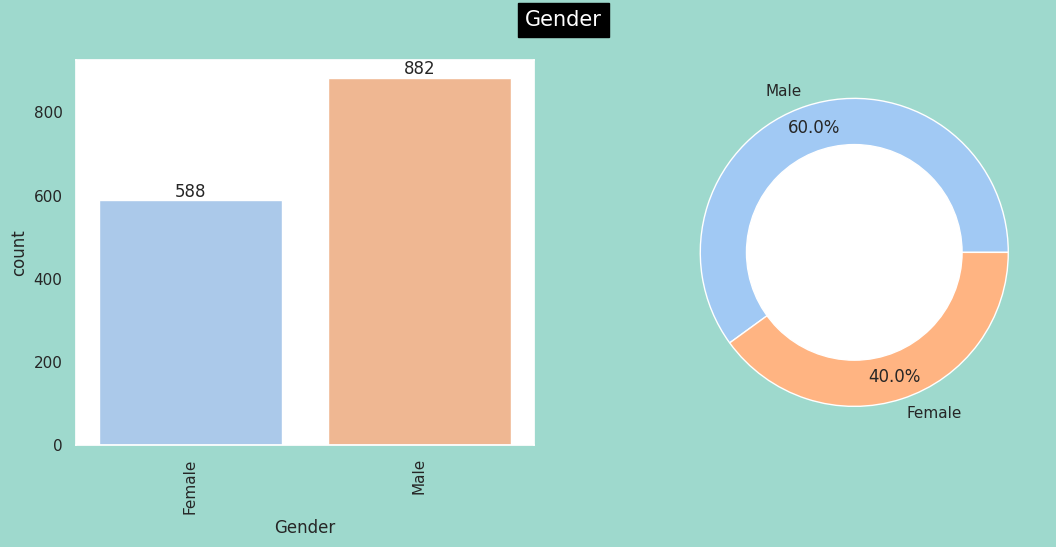

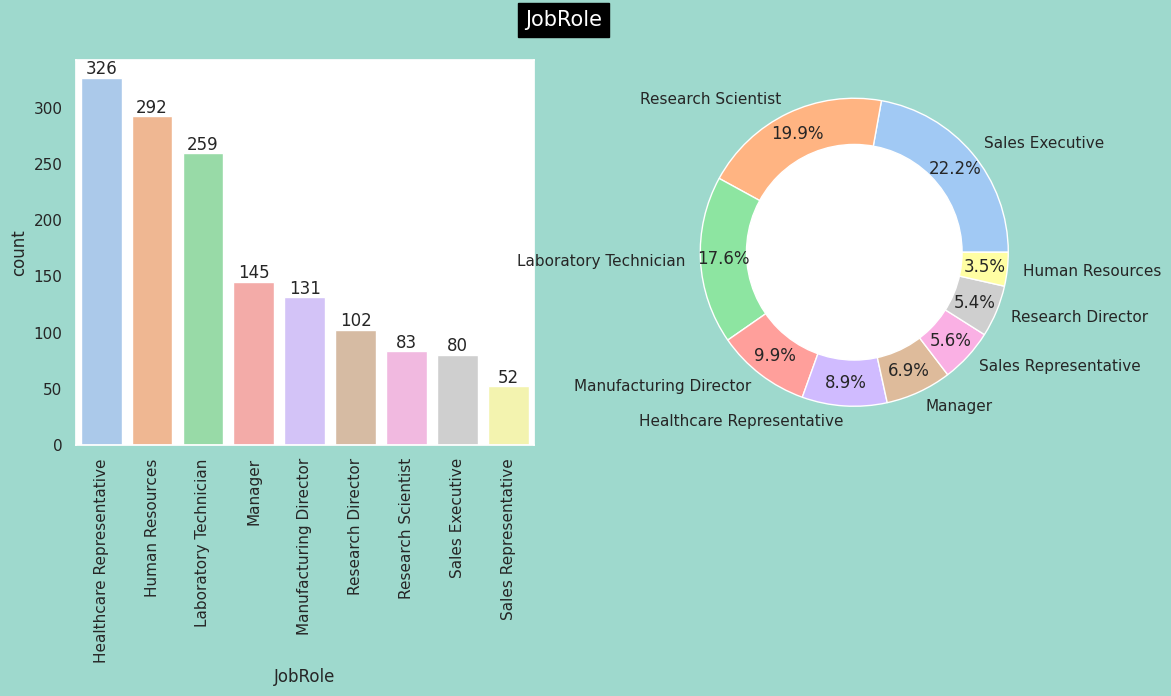

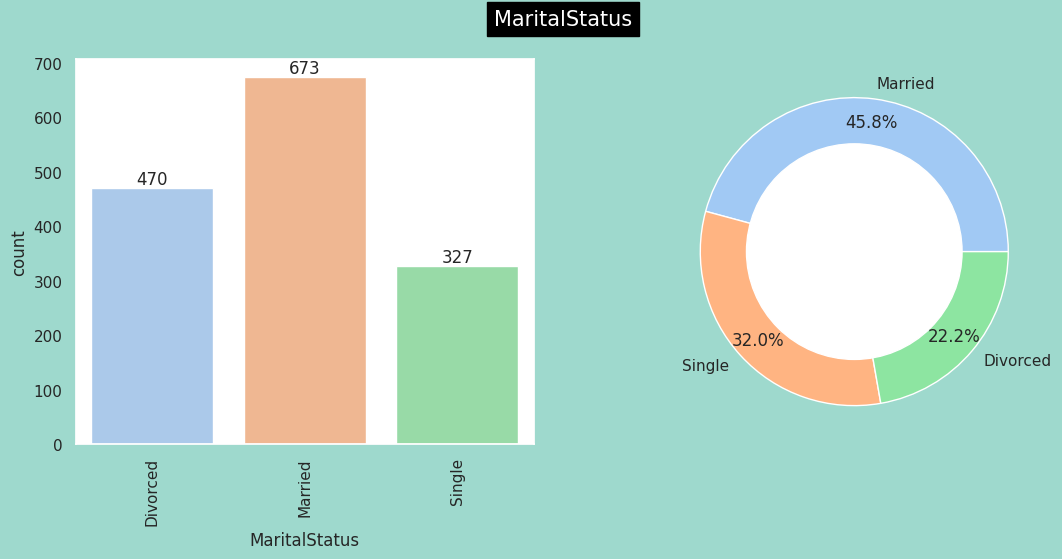

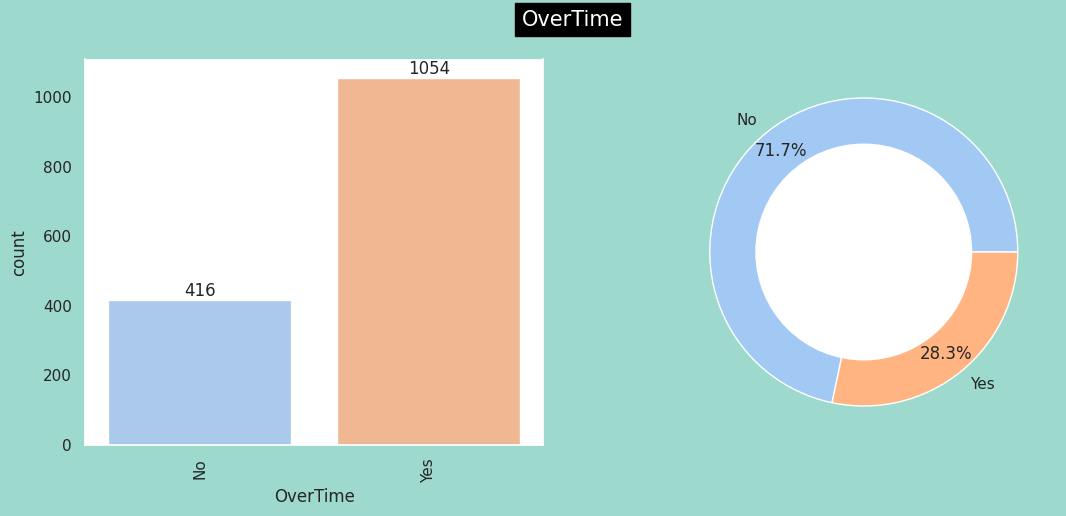

In [ ]:
sns.set(rc={'axes.facecolor':'white','figure.facecolor':'#9ed9cd'})
sns.set_palette('pastel')
for i, col in enumerate(cat):
    fig, axes = plt.subplots(1,2,figsize=(13,5))



    ax = sns.countplot(data=df,x=col , ax=axes[0])


    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)

    for container in axes[0].containers:
        axes[0].bar_label(container)


    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05,0.05)


    axes[1].pie(size , labels=index,autopct='%1.1f%%',pctdistance=0.85)

    #inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)


    plt.show()

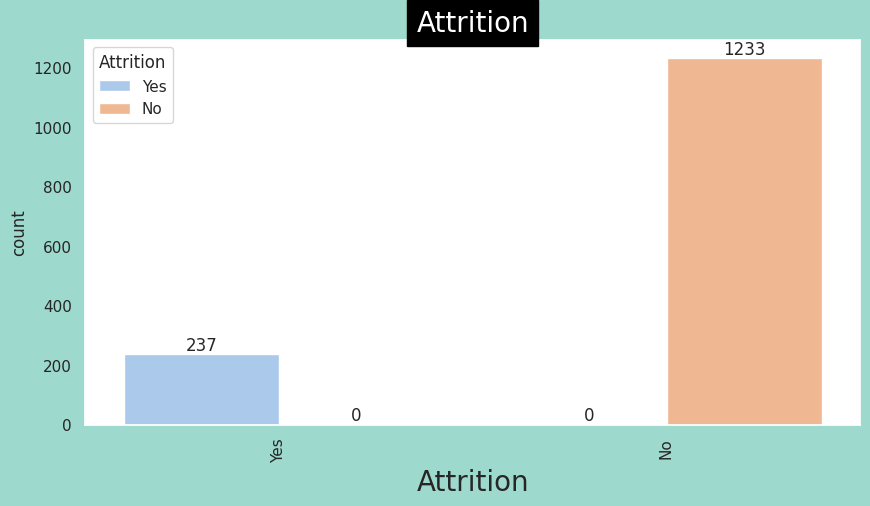

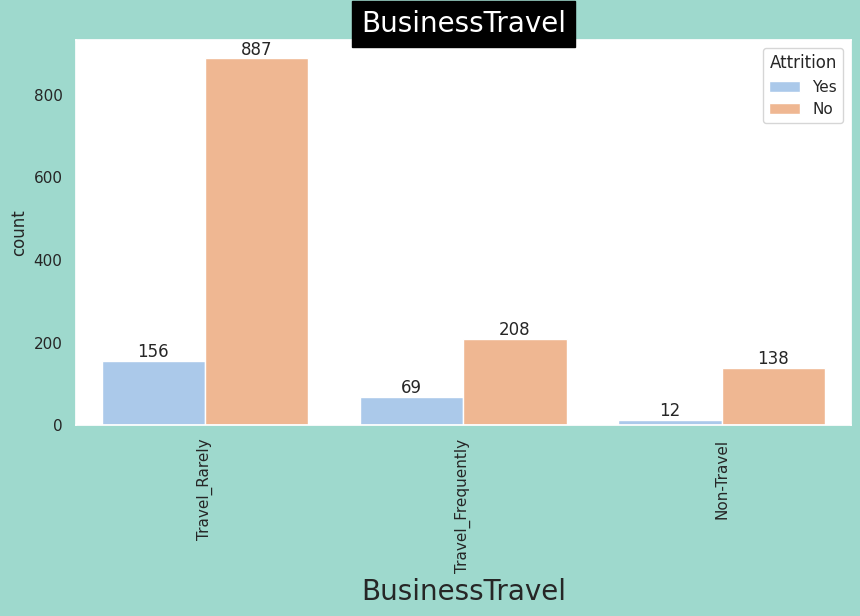

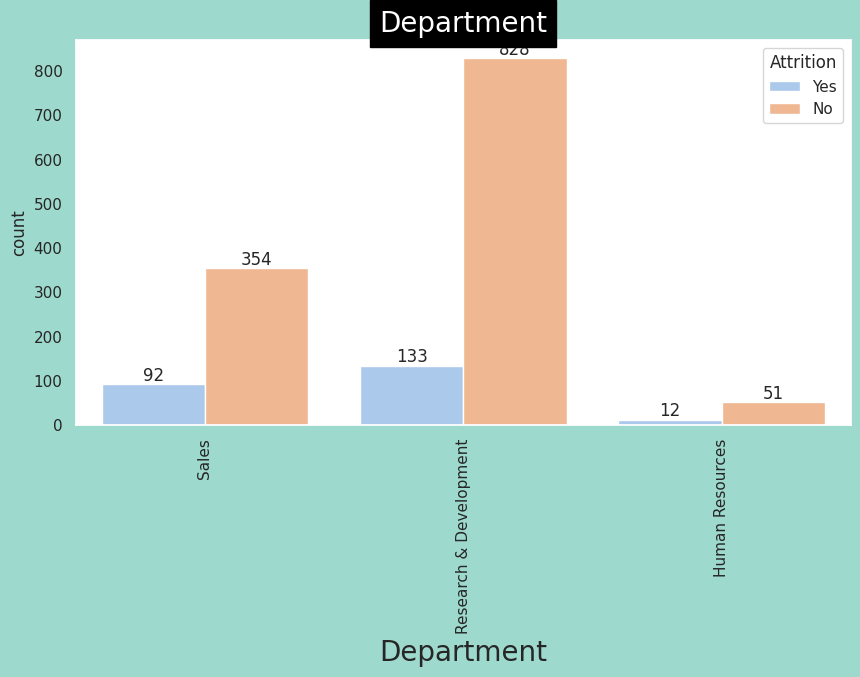

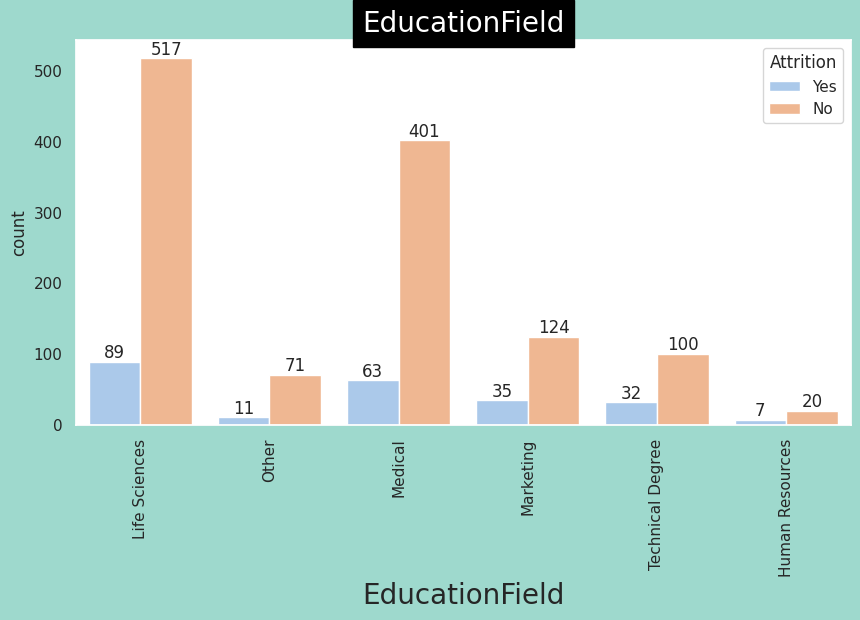

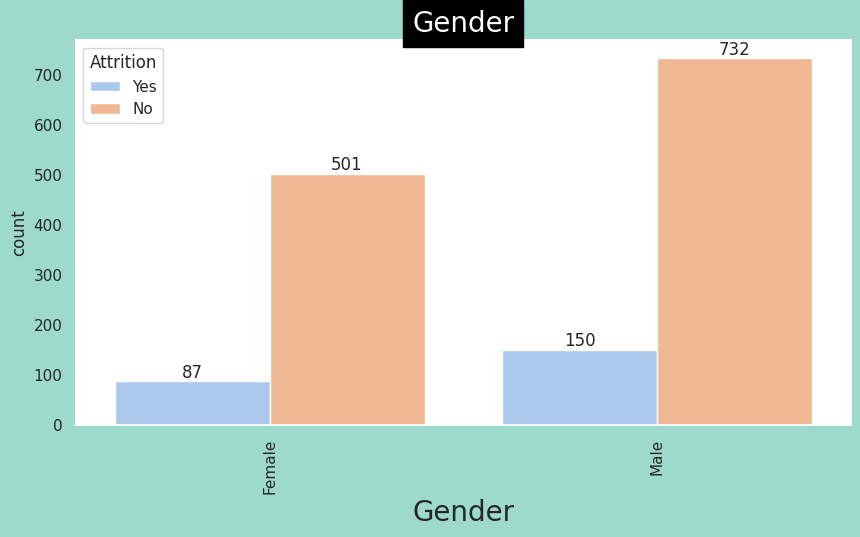

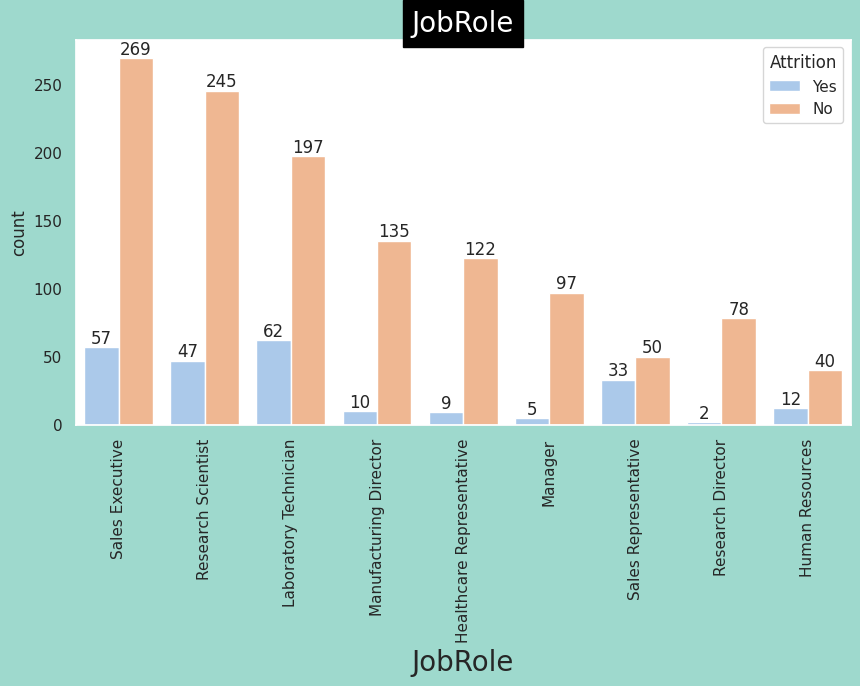

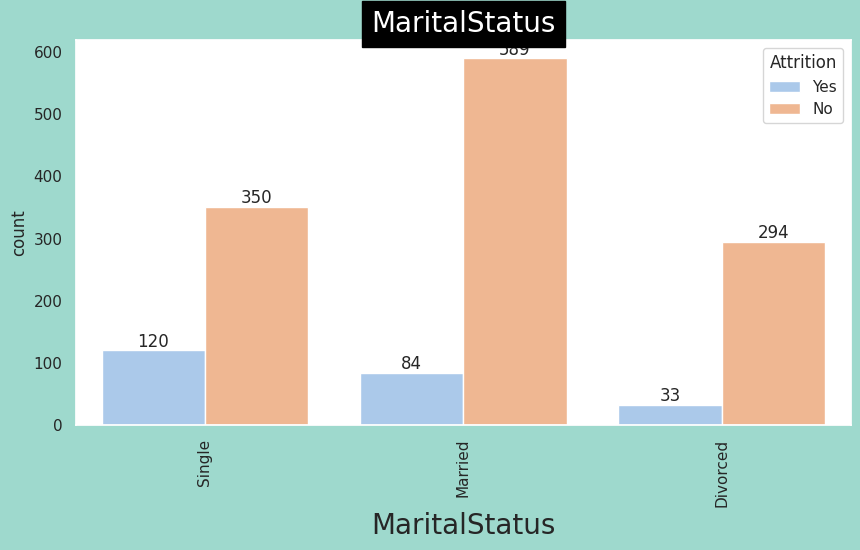

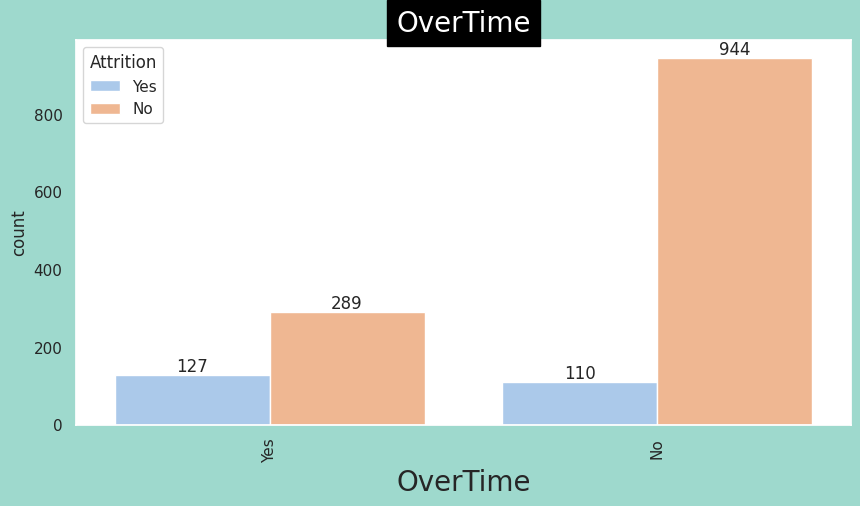

In [ ]:
for col in cat:
    plt.figure(figsize=(10,5))

    ax = sns.countplot(x=df[col],data=df,hue='Attrition')

    for container in ax.containers:
        ax.bar_label(container)

    plt.title(col,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(col,fontsize=20)
    plt.grid()
    plt.show()

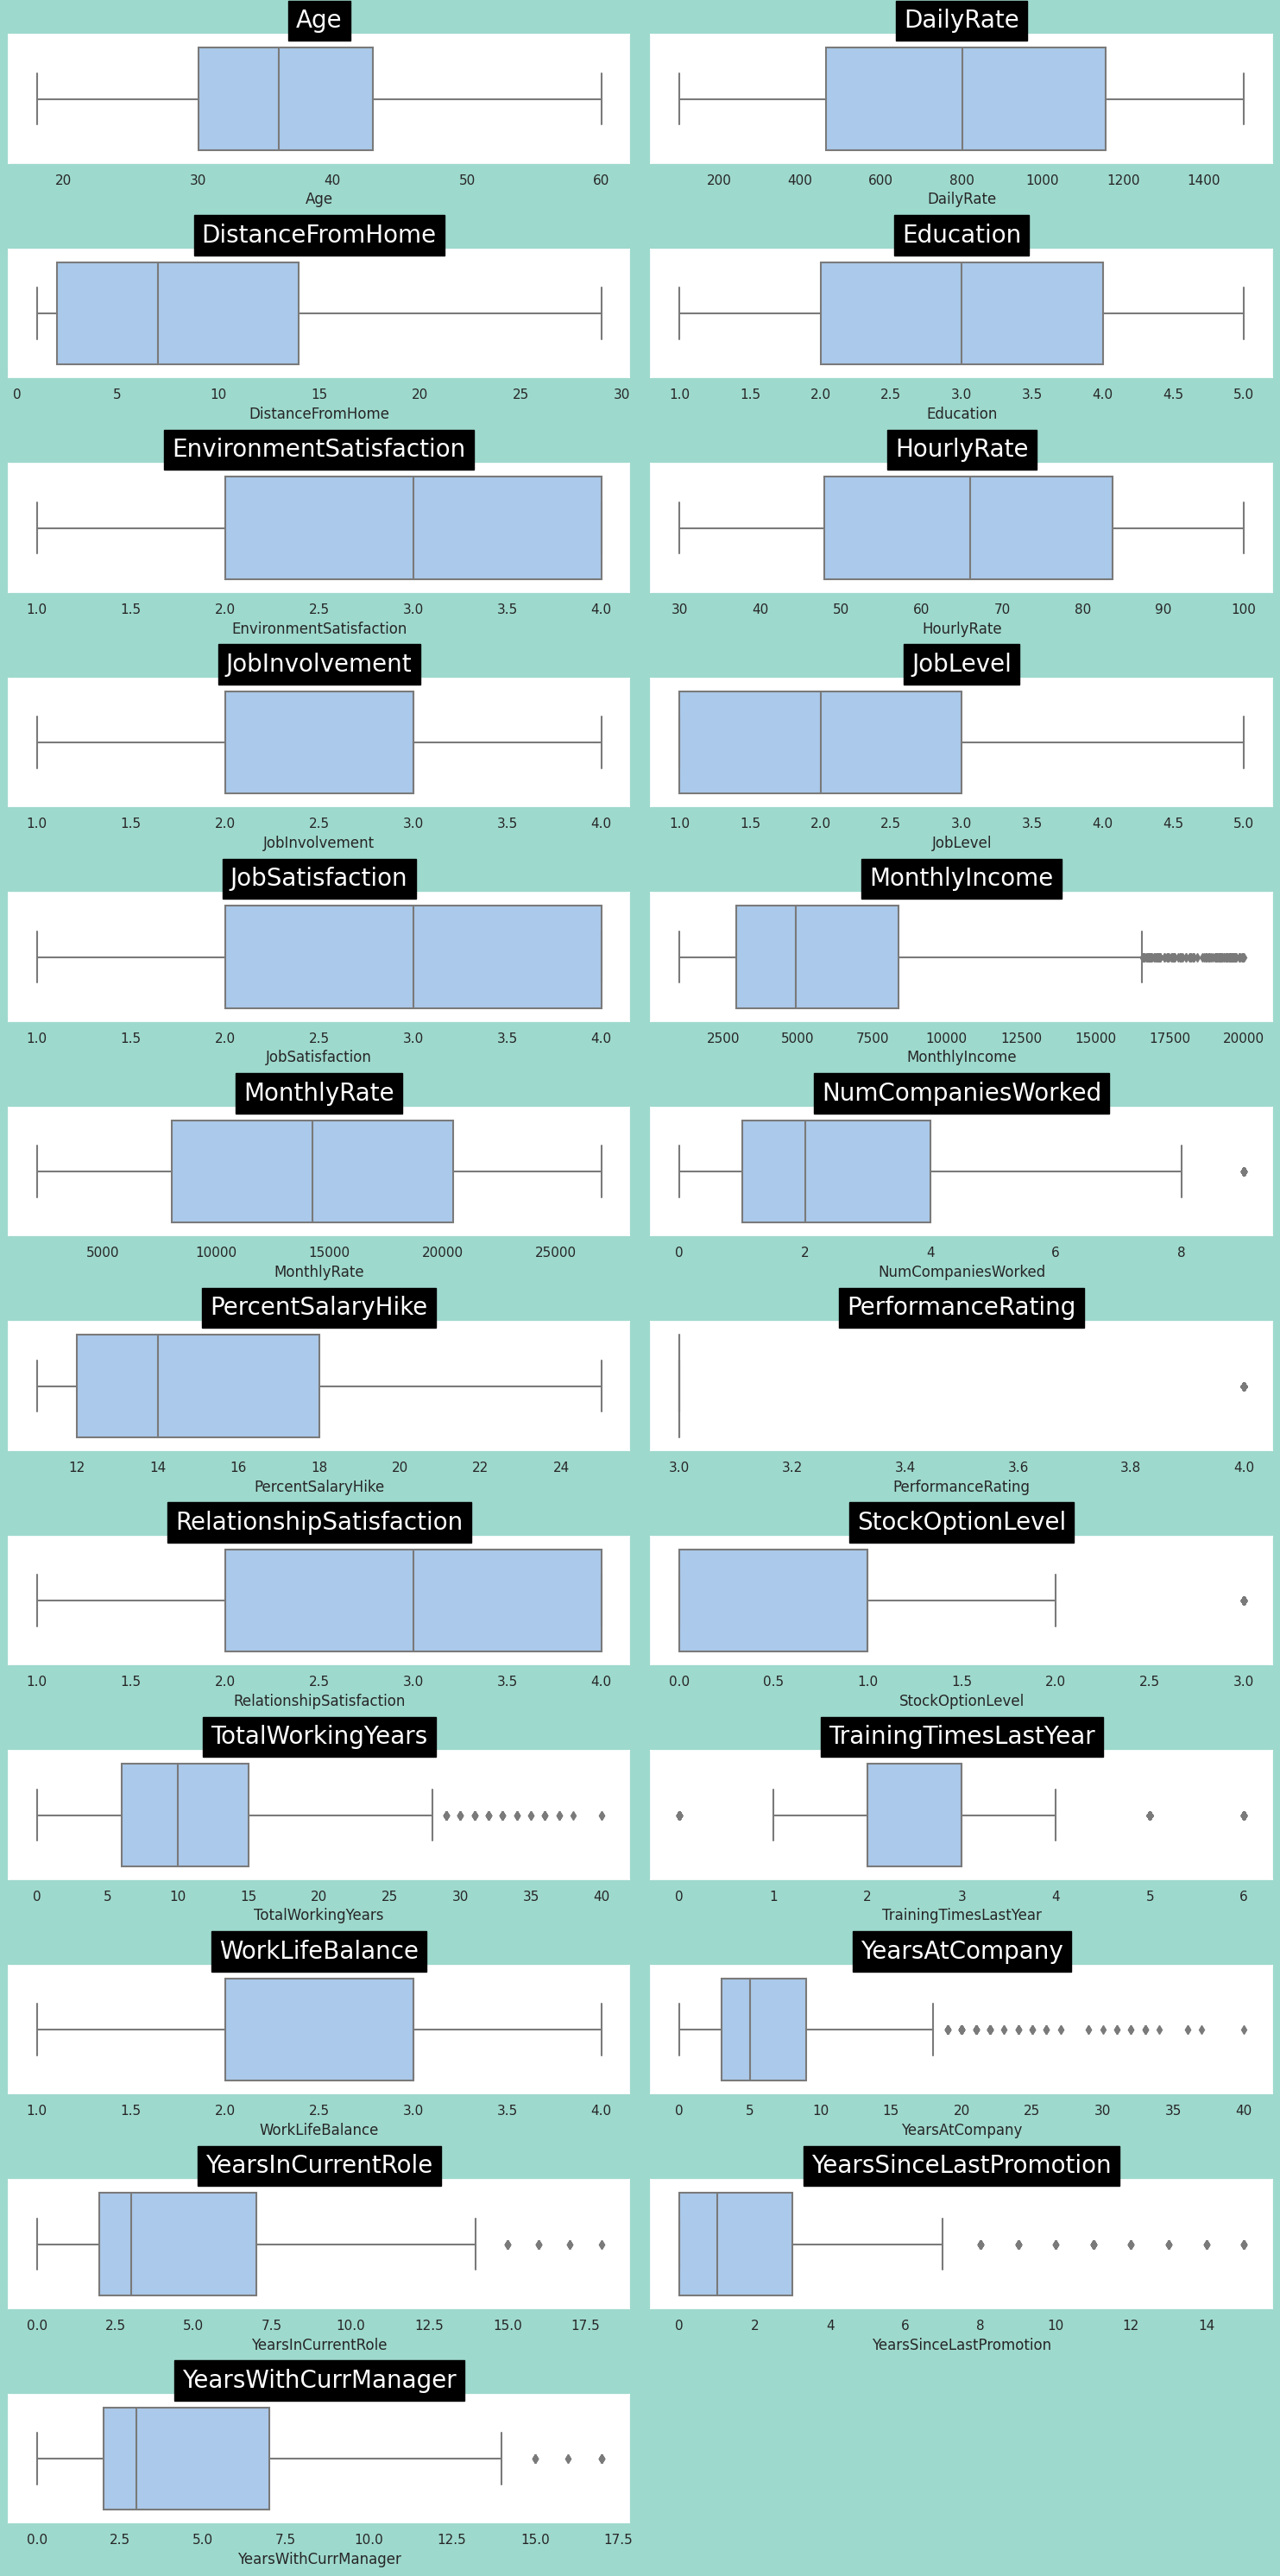

In [ ]:
plt.figure(figsize=(15,30))
for idx,i in enumerate (num):
    plt.subplot(12,2,idx+1)
    sns.boxplot(x=i,data=df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=20)
    plt.xlabel(i,size=12)

plt.tight_layout()
plt.show()

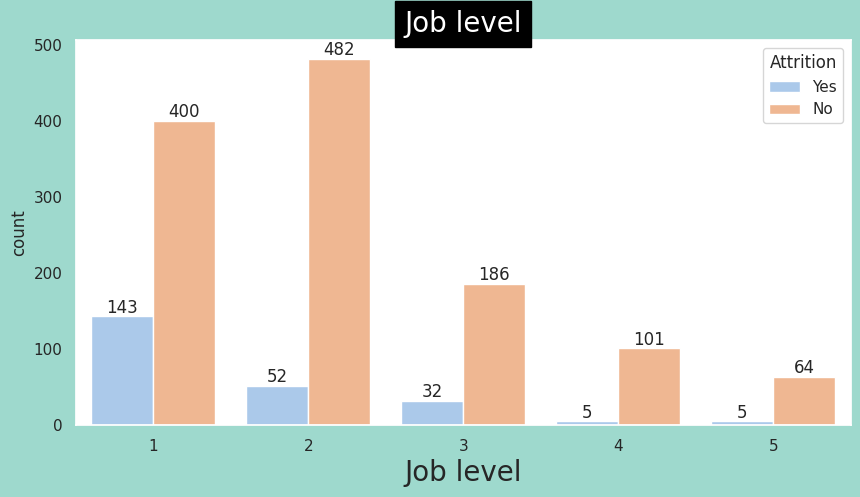

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x=df['JobLevel'],data=df,hue='Attrition')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Job level',backgroundcolor='black',color='white',fontsize=20)
plt.xlabel('Job level',fontsize=20)
plt.grid()
plt.show()

<Figure size 500x1000 with 0 Axes>

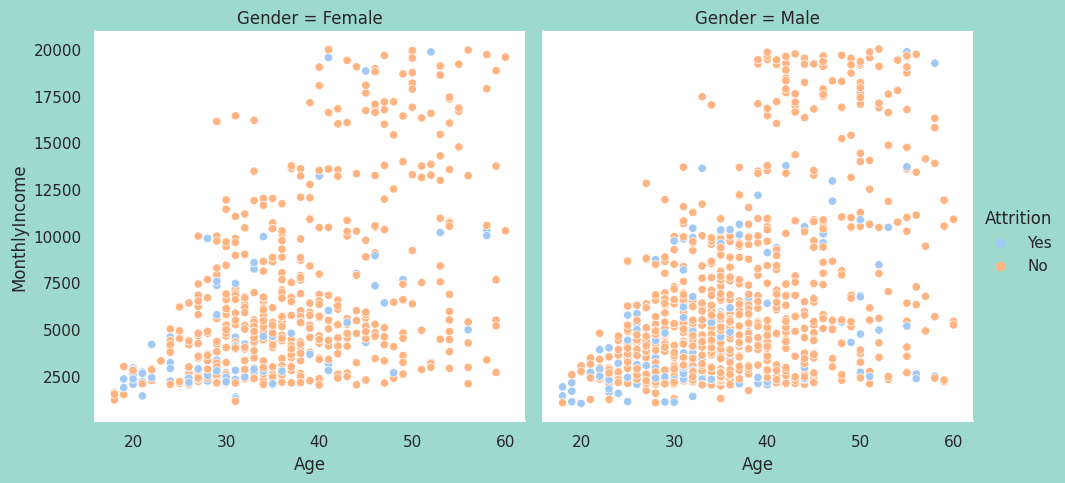

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Age',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

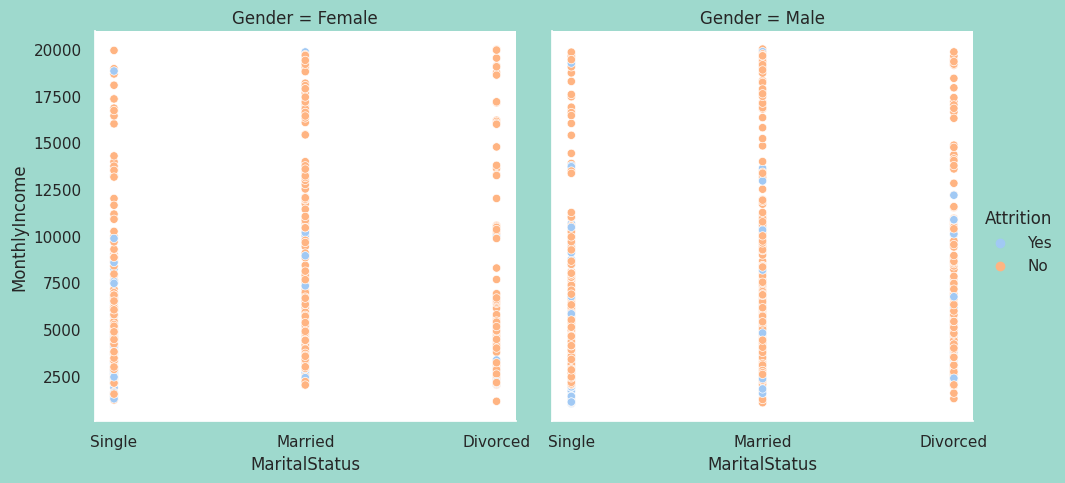

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='MaritalStatus',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

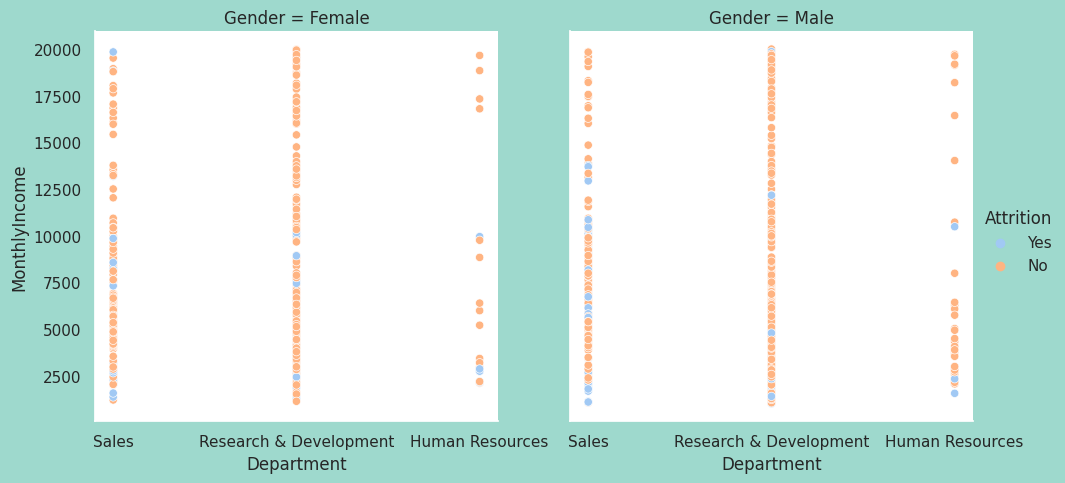

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Department',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

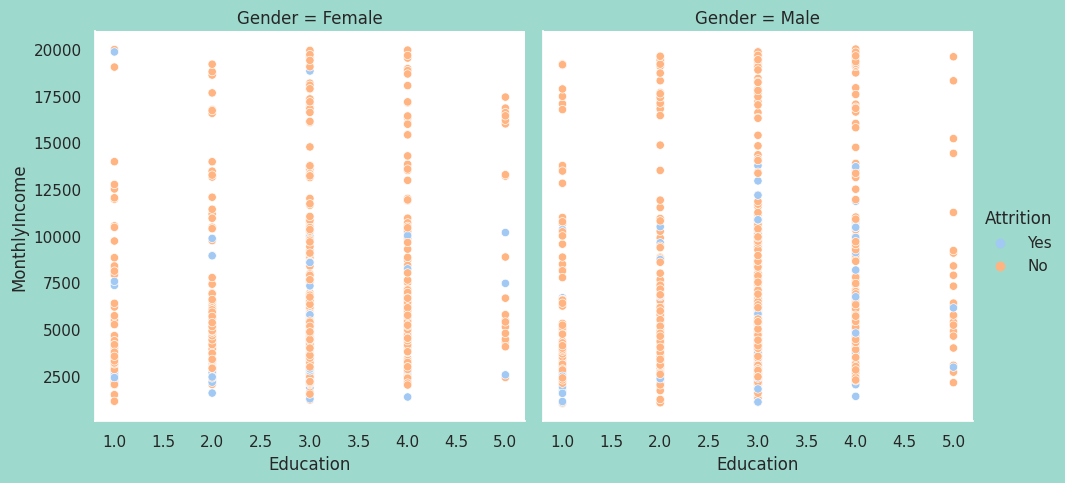

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Education',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

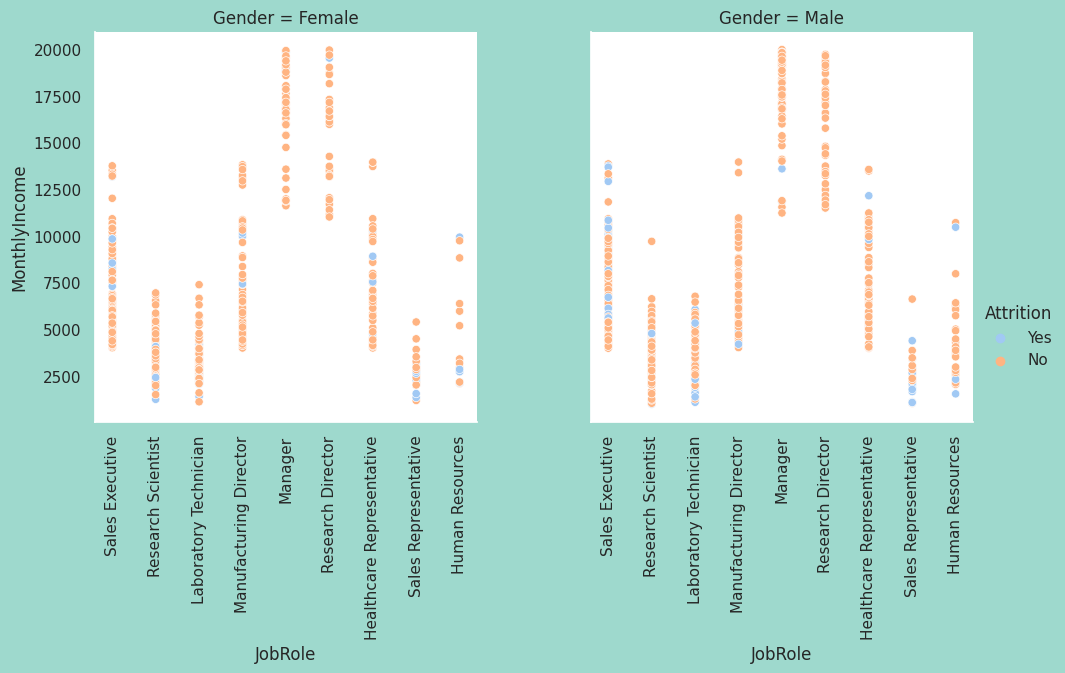

In [ ]:
plt.figure(figsize=(5,10))
ax = sns.relplot(data=df,y='MonthlyIncome',x='JobRole',hue='Attrition',col='Gender')
rotation = 90
for i , ax in enumerate (ax.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)



plt.show()


<Figure size 500x1000 with 0 Axes>

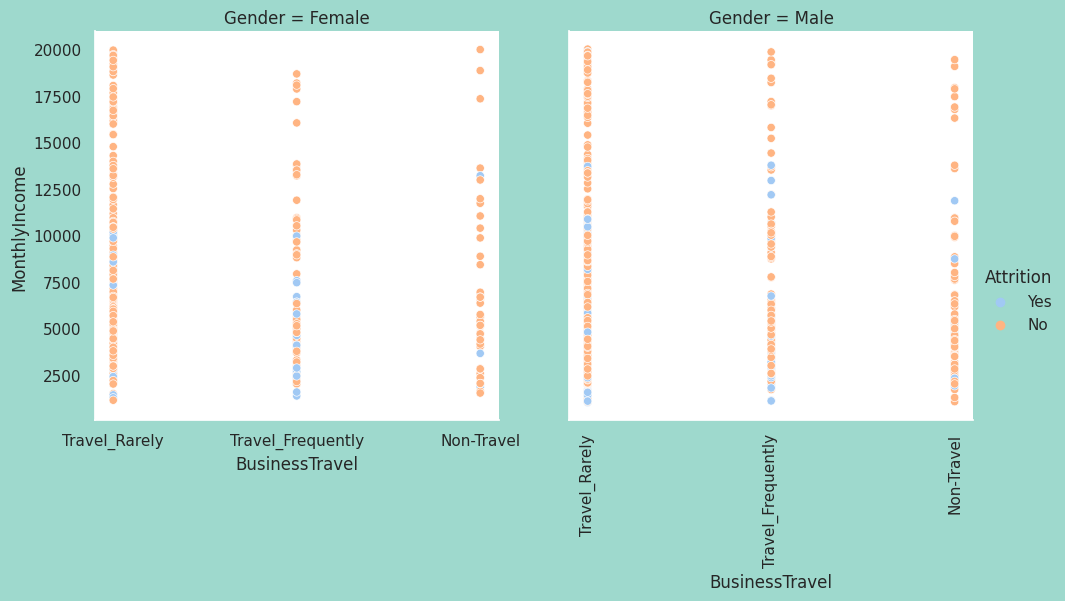

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='BusinessTravel',hue='Attrition',col='Gender')
plt.xticks(rotation=90)
plt.show()


💡 Analysis of graphs
* Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
* As income increases, attrition decreases.
* Attrition is much, much less in divorced women.
* Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
* Attrition is the highest for those in level 1 jobs.
* Women with the job position of manager, research director and technician laboratory have almost no attrition.
* Men with the position of sales expert have a lot of attrition.

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df_copy['Attrition'] = label_encoder.fit_transform(df_copy['Attrition'])
df_copy['OverTime'] = label_encoder.fit_transform(df_copy['OverTime'])
df_copy['Gender'] = label_encoder.fit_transform(df_copy['Gender'])

# One_hot Encoding

In [ ]:
df_copy = pd.get_dummies(df_copy,columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])

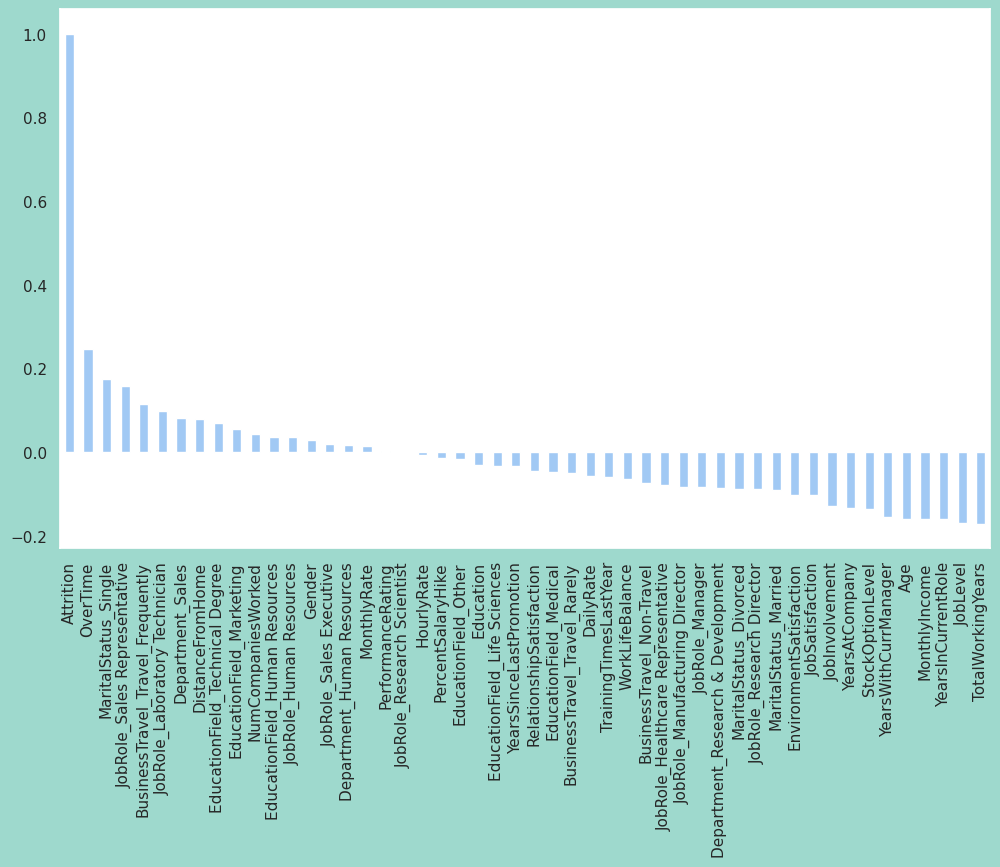

In [ ]:
plt.figure(figsize=(12,7))
correlations = df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [ ]:
df2.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


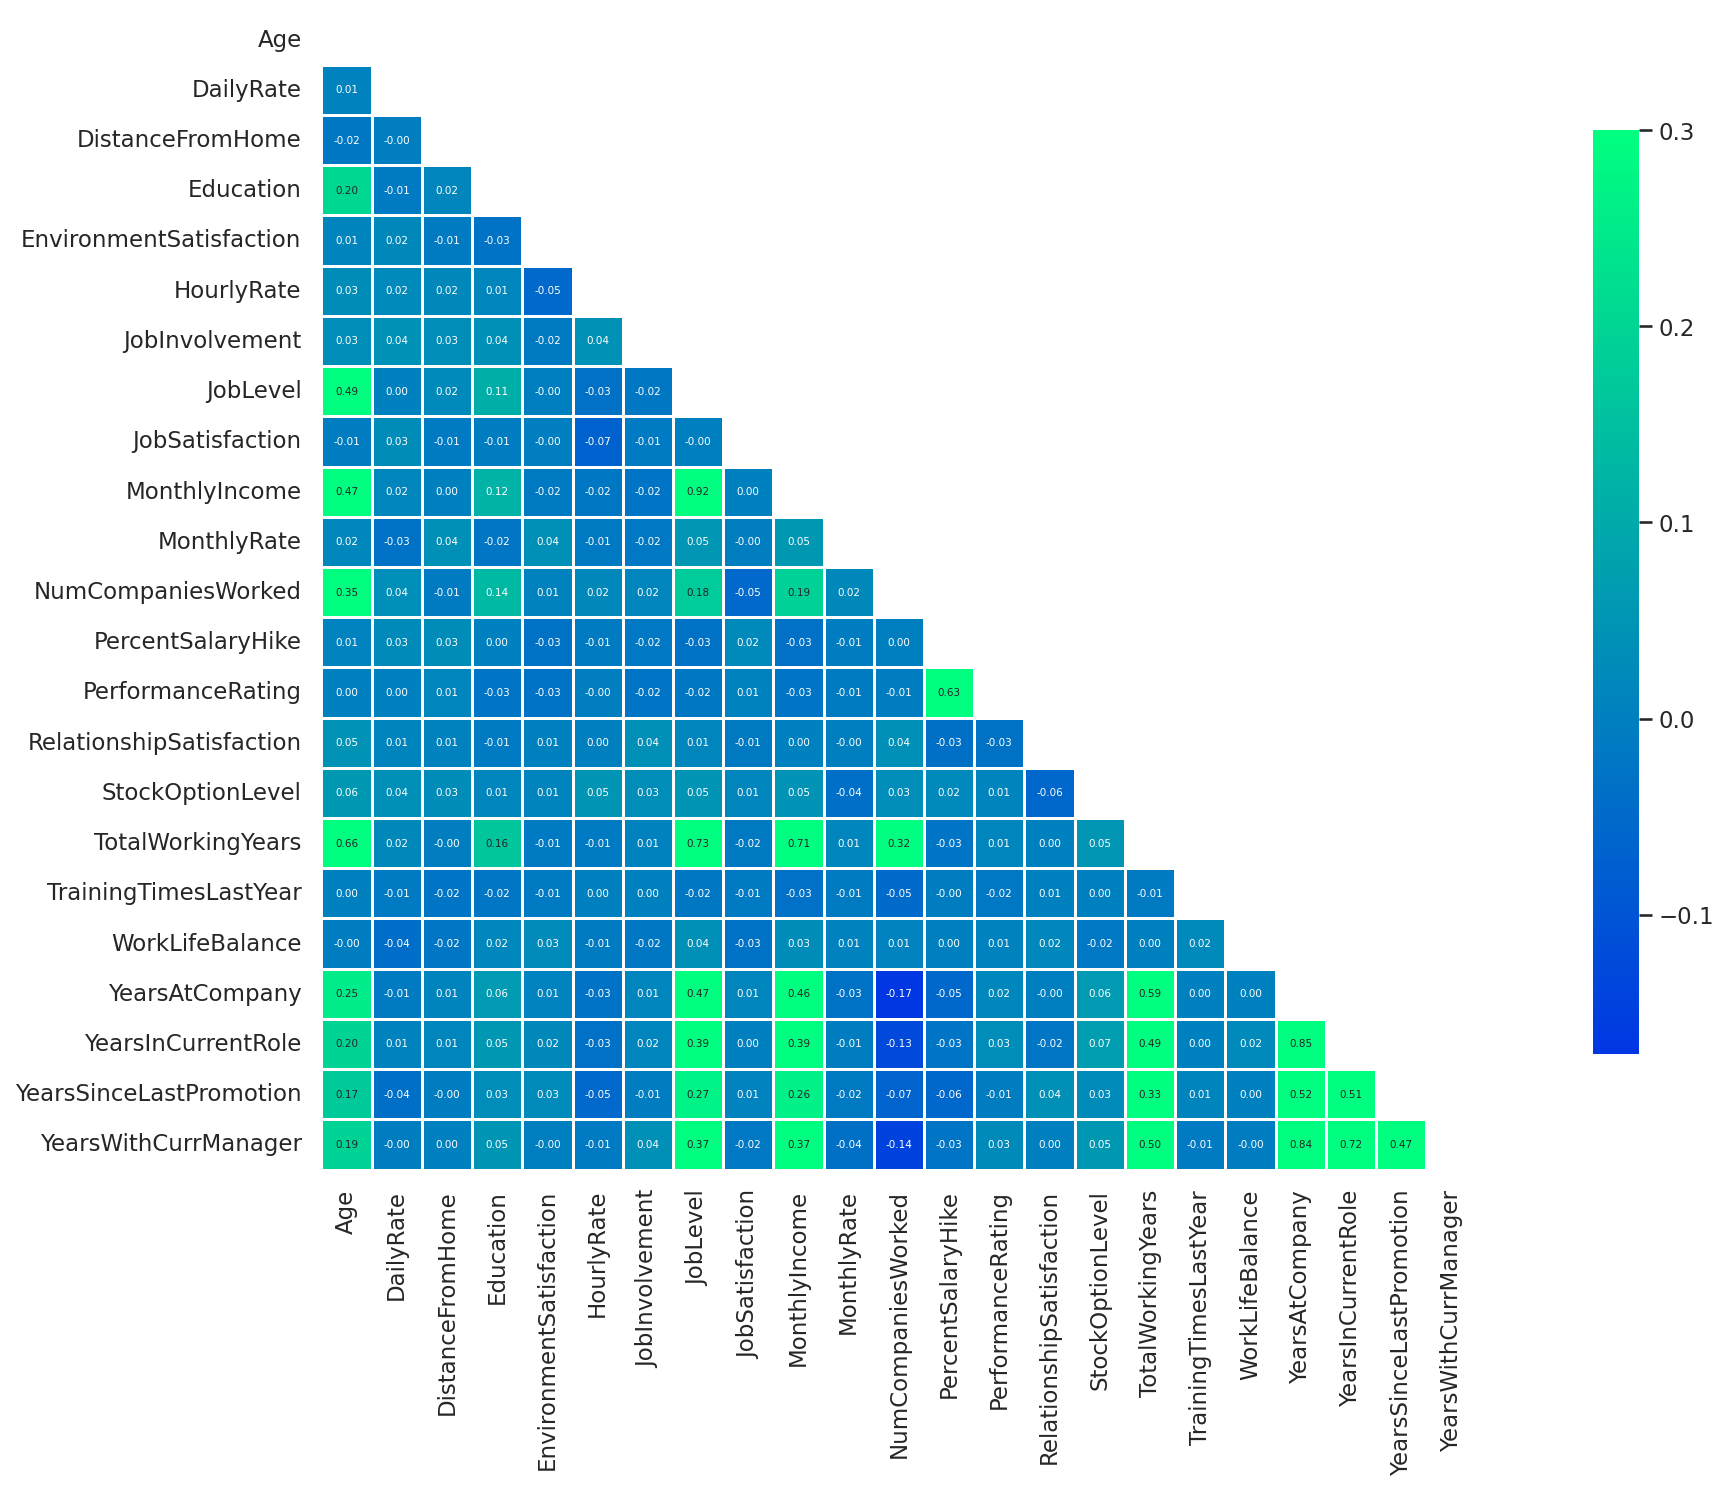

In [ ]:
df2_copy = df2.copy()
df2_copy = df2_copy.drop(['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
corr = df2_copy.corr(method='spearman')
sns.set(style='white')



mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(20,10),dpi=150)
sns.heatmap(corr, mask=mask, cmap='winter',vmax=.3, center=0 , square=True , linewidths=.5, cbar_kws={'shrink':.8,},
           annot=True , fmt='.2f',annot_kws={'fontsize':5})

plt.show()

There are high correlation between some features:

* monthlyincome & joblevel
* year in currentrol , year at company, year with current manager & year in current role

# ****ML Models

In [ ]:
DF = df.copy()

In [ ]:
DF.replace({'BusinessTravel':{'Travel_Rarely':2,'Travel_Frequently':3,'Non-Travel':4},
           'Attrition':{'Yes':2,'No':3},
           'OverTime':{'Yes':2,'No':3},
           'Gender':{'Male':2,'Female':3},
           'MaritalStatus':{'Single':2,'Married':3,'Divorced':4},
           'Department':{'Sales':2,'Human Resources':3,'Research & Development':4},
           'EducationField':{'Life Sciences':2,'Medical':3,'Marketing':4,'Technical Degree':2,'Human Resources':3,'Other':4},
           'JobRole':{'Sales Executive':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':2,'Research Director':3,
                     'Laboratory Technician':4,'Sales Representative':2,'Research Scientist':3,'Human Resources':4}},inplace=True)

In [ ]:
DF

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1102,2,1,2,2,2,3,...,3,1,0,8,0,1,6,4,0,5
1,49,3,3,279,4,8,1,2,3,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,1373,4,2,2,4,4,2,...,3,2,0,7,3,3,0,0,0,0
3,33,3,3,1392,4,3,4,2,4,3,...,3,3,0,8,3,3,8,7,3,0
4,27,3,2,591,4,2,1,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,3,884,4,23,2,3,3,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,3,2,613,4,6,1,3,4,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,3,2,155,4,4,3,2,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,3,3,1023,2,2,3,3,4,2,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [ ]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1,1)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
1374,0.952381,0.0,0.360057,0.0,0.714286,0.50,0.0,1.000000,1.0,0.600000,...,0.444444,0.0,0.142857,0.0,0.666667,0.333333,0.725,0.333333,0.333333,0.000000
1092,0.642857,0.0,0.607015,1.0,0.964286,0.50,0.0,1.000000,0.0,0.957143,...,0.444444,1.0,0.642857,1.0,1.000000,0.333333,0.200,0.500000,0.666667,0.000000
768,0.523810,0.0,0.141732,0.0,0.892857,0.50,1.0,0.666667,0.0,0.628571,...,0.111111,1.0,0.214286,0.0,0.333333,0.333333,0.200,0.500000,0.333333,0.466667
569,0.428571,1.0,0.953472,0.0,0.250000,0.75,0.0,0.000000,0.0,0.657143,...,0.111111,1.0,0.285714,0.0,0.333333,0.000000,0.250,0.166667,0.666667,0.000000
911,0.166667,0.5,0.355762,0.0,0.821429,0.00,0.0,0.666667,0.0,0.614286,...,0.111111,0.0,0.214286,0.0,1.000000,0.000000,0.025,0.666667,0.666667,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.380952,0.0,0.881174,0.0,0.321429,0.75,0.0,0.666667,1.0,0.814286,...,0.111111,0.0,0.571429,0.0,1.000000,0.333333,0.025,0.333333,0.666667,0.000000
835,0.404762,0.0,0.304939,0.5,0.250000,0.75,0.0,0.666667,0.0,1.000000,...,0.111111,1.0,0.428571,0.0,0.333333,0.000000,0.150,0.333333,0.000000,0.066667
1216,0.595238,0.0,0.770938,0.0,0.035714,0.50,0.5,1.000000,0.0,0.614286,...,0.111111,0.0,0.428571,0.0,0.000000,0.333333,0.250,0.500000,0.666667,0.533333
559,0.476190,0.0,0.118826,1.0,0.035714,1.00,0.5,1.000000,0.0,0.885714,...,0.666667,0.0,0.142857,0.0,0.333333,0.333333,0.150,0.000000,0.000000,0.000000


In [ ]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(X_train,Y_train)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train,smote_target)
y_pred_lg = log_reg.predict(X_test)

print('accuracy',metrics.accuracy_score(Y_test,y_pred_lg))

accuracy 0.7687074829931972


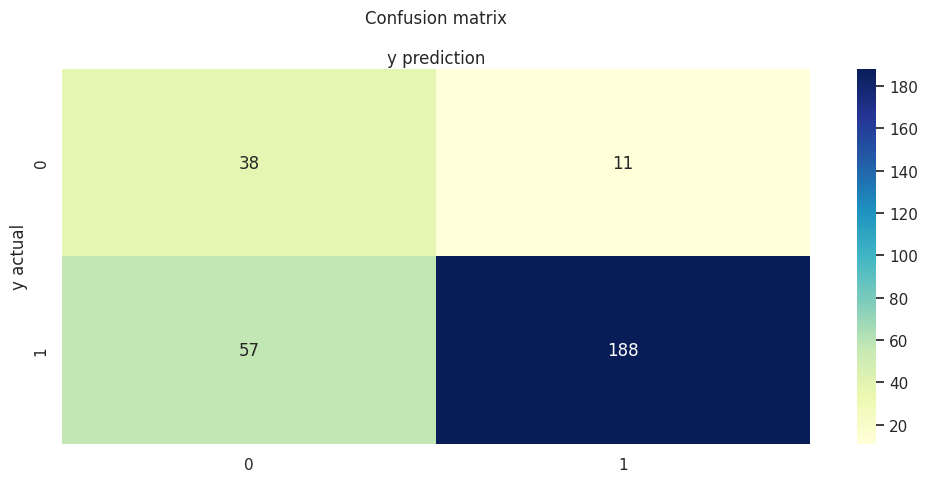

              precision    recall  f1-score   support

         0.0       0.40      0.78      0.53        49
         1.0       0.94      0.77      0.85       245

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.79       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sm = metrics.confusion_matrix(Y_test,y_pred_lg)
sns.heatmap(sm,annot=True,cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(Y_test, y_pred_lg))

# 2 : Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train,smote_target)
y_pred_rf = rfc.predict(x_test)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.9829931972789115


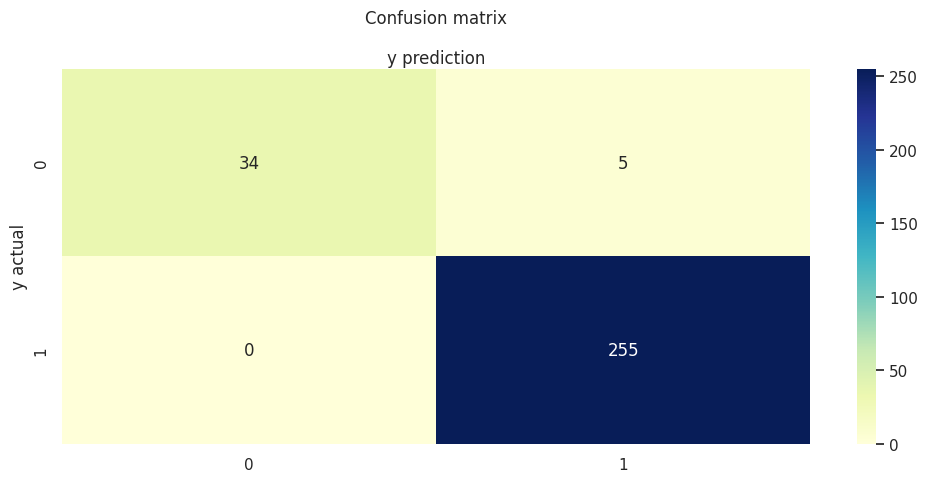

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.94      0.96       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_rf))

# Gradient Boosted

In [ ]:
gb_params = {'n_estimators':1500,
            'max_features':0.9,
            'learning_rate':0.25,
            'max_depth':4,
            'min_samples_leaf':2,
            'subsample':1,
            'max_features':'sqrt',
            'random_state':0,
            'verbose':0}



from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train,smote_target)

gb_predict = gb.predict(x_test)

print('accuracy',metrics.accuracy_score(y_test,gb_predict))

accuracy 0.9795918367346939


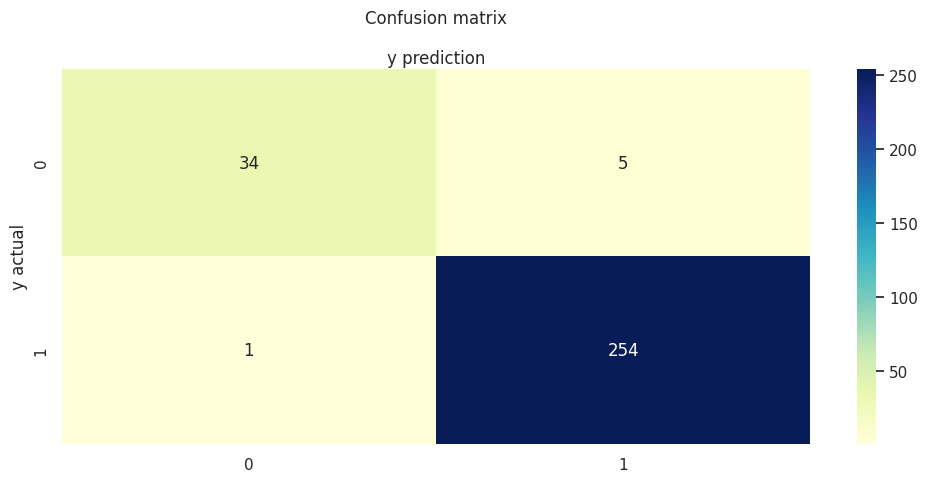

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.98      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,gb_predict)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, gb_predict))

# Best model with 98% accuracy is gradient boost